# data augmentation

DNN model is data "hungry". When the dataset is not big enough, some techniques is required to improve the dataset. Data augmentation is one of those techniques.

`keras.preprocessing.image.ImageDataGenerator` is a data generator that can conveniently generate `(data,label)` pairs from specified folder. Another big advantage of using `keras.preprocessing.image.ImageDataGenerator` is that it can perform data augmentation while generating `(data,label)` pairs.

You can refer to [keras documentation](https://keras.io/preprocessing/image/) for detail.

keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0.0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0)

* rotation_range: Int. Degree range for random rotations.
* width_shift_range: Float, 1-D array-like or int 
    * float: fraction of total width, if < 1, or pixels if >= 1.
    * 1-D array-like: random elements from the array.
    * int: integer number of pixels from interval  (-width_shift_range, +width_shift_range)
    * With width_shift_range=2 possible values are integers [-1, 0, +1], same as with  width_shift_range=[-1, 0, +1], * while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
* height_shift_range: Float, 1-D array-like or int
    * float: fraction of total height, if < 1, or pixels if >= 1.
    * 1-D array-like: random elements from the array.
    * int: integer number of pixels from interval  (-height_shift_range, +height_shift_range)
    * With height_shift_range=2 possible values are integers [-1, 0, +1], same as with  height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
* shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
* zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
* channel_shift_range: Float. Range for random channel shifts.
* fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
    * 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
    * 'nearest': aaaaaaaa|abcd|dddddddd
    * 'reflect': abcddcba|abcd|dcbaabcd
    * 'wrap': abcdabcd|abcd|abcdabcd
* cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
* horizontal_flip: Boolean. Randomly flip inputs horizontally.
* vertical_flip: Boolean. Randomly flip inputs vertically.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as py

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')

file_path="data/membrane/train"
save_to = "data/membrane/train/aug"
image_color_mode = "grayscale"
label_color_mode = "grayscale"
image_folder="image"
label_folder="label"
target_size=(256, 256)
batch_size=20

# image_datagen = ImageDataGenerator()
image_datagen = ImageDataGenerator(**data_gen_args)
image_generator = image_datagen.flow_from_directory(
    directory = file_path,
    classes = [image_folder],
    class_mode = None,
    color_mode = image_color_mode,
    target_size = target_size,
    batch_size = batch_size,
#     save_to_dir = save_to,
#     save_prefix = "image",
    seed=1
)

label_datagen = ImageDataGenerator(**data_gen_args)
label_generator = label_datagen.flow_from_directory(
    directory = file_path,
    classes = [label_folder],
    class_mode = None,
    color_mode = label_color_mode,
    target_size = target_size,
    batch_size = batch_size,
#     save_to_dir = save_to,
#     save_prefix = "label",
    seed=1
)

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


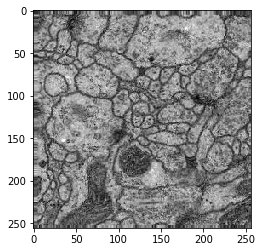

In [3]:
for image in image_generator:
    plt.imshow(image[0][:, :, 0], cmap='gray')
    plt.show()
    
    break

In [49]:
#you will see 60 transformed images and their labels in data/membrane/train/aug
num_batch = 3
for i,batch in enumerate(image_generator):
    if(i >= num_batch):
        break
        
for i,batch in enumerate(label_generator):
    if(i >= num_batch):
        break
#     print(image[0][:, :, 0].shape)
#     plt.imshow(image[0][:, :, 0], cmap='gray')
    
#     plt.show()
#     if i==0:
#         break